# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #08</span>

L'ottava esercitazione del corso verteva principalmente sulle possibili applicazioni dei metodi di campionamento stocastico a calcoli di tipo quantistico, analogamente a quanto fatto nell'esercitazione 5, dove abbiamo sfruttato l'algoritmo di Metropolis per campionare il modulo quadro della funzione d'onda associata all'atomo di idrogeno. In particolare, durante la lezione teorica, abbiamo avuto modo di trattare due argomenti cardine in questo contesto:

- il **Principio Variazionale**;
- la tecnica del **Path Integral**.

Abbiamo infatti visto come, grazie al primo, si possano stimare le proprietà dello stato fondamentale di un generico sistema, purchè si conosca l'Hamiltoniana. Se si applicano tecniche di ottimizzazione variazionali, diventa possibile ricavare i valori d'aspettazione caratteristici del sistema, come l'energia totale, semplicemente implementando il calcolo di integrali via metodi Monte Carlo, $i.e.$ campionando particolari distribuzioni di probabilità tramite algoritmo di Metropolis.

Il secondo punto rappresenta invece uno dei più importanti successi raggiunti da Feynmann nel corso della sua carriera scientifica. Il Path Integral permette di ottenere un mapping esatto di un sistema quantistico in un sistema classico, costituito da speciali polimeri ad anello interagenti tra loro. Nello specifico, dato un sistema quantistico costituito da $N$ particelle interagenti, si può dimostrare, applicando la tecnica del Path Integral, che esso è isomorfo ad un sistema classico in cui ogni particella è mappata in un polimero ad anello (aumento dei gradi di libertà) legato da interazioni di tipo armonico. Seguendo questo modello, diventa quindi possibile ricavare i valori d'aspettazione quantistico di un generico operatore in termini di una media termica, valutata su di un sistema a temperatura finita (noi ci siamo riferiti all'insieme canonico). Questo calcolo può essere chiaramente condotto per mezzo di simulazioni di tipo Monte Carlo (**Path Integral Monte Carlo**). Un'altra possibile applicazione del Path Integral trattata a lezione, è rappresentata dal metodo proiettivo sul ground state a $T = 0K$ (**Path Integral Ground State**). Questa tecnica sfrutta un'importante proprietà dell'evoluzione per tempi immaginari: propagando per tempi immaginari molto grandi un generico stato quantistico $\Psi (\tau)$, esso tenderà a diventare proporzionale all'esatto stato di ground state $\Psi_0$, infatti

$$
| \Psi (\tau) \rangle = \exp{\left( - \tau \hat H \right)} | \Psi (0) \rangle =
\exp{\left( - \tau \hat H \right)} \sum_n c_n | \Psi _n \rangle =
\sum_n c_n \exp{\left( - \tau E_n \right)} | \Psi _n \rangle \underset{\tau >> 1}\approx
c_0 \exp{\left( - \tau E_0 \right)} | \Psi _0 \rangle
$$

dove $| \Psi _n \rangle$ rappresentano gli autostati dell'Hamiltoniana $\hat H$. Ovviamente, affinchè la relazione abbia senso, è necessario che lo stato da proiettare $\Psi (\tau)$ non sia ortogonale a $\Psi_0$. In analogia al caso precedente, è inoltre possibile dimostrare che i valori d'aspettazione valutati sull'esatto ground state, sono equivalenti alle medie calcolate su un sistema classico di polimeri lineari interagenti.

### <span style="color:darkorange"> Esercizio 08.1 </span>

Il primo esercizio consisteva nella scrittura di un codice Monte Carlo Variazionale, allo scopo di risolvere numericamente il problema unidimensionale, non analiticamente risolvibile, associato ad una singola particella libera sottoposta ad un potenziale esterno del tipo:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Nello specifico, il programma doveva essere in grado di calcolare, tramite metodo a blocchi, il valore d'aspettazione dell'Hamiltoniana su di un generico stato quantistico di prova $\Psi_T(x)$. Come ben sappiamo, inserendo una risoluzione dell'identità in rappresentazione delle coordinate, questa quantità può essere riscritta in termini di un semplice integrale unidimensionale.

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

dove

$$
{\hat H} \Psi_T(x) = \left[ - \hbar^2 \frac{\partial ^2}{\partial x ^2} + V(x) \right] \Psi_T(x)
$$

Il calcolo si un siffatto integrale, può essere condotto andando a campionare il modulo quadro della funzione d'onda di prova sfruttando l'algoritmo di Metropolis con matrice di trasferimento uniforme, in modo analogo a quanto visto durante la quinta esercitazione.

### <span style="color:darkorange"> Esercizio 08.2 </span>

All'interno del secondo esercizio, abbiamo potuto applicare il codice precedentemente implementato, per ottenere un'approssimazione della funzione d'onda di ground state, tramite il metodo **Monte Carlo Variazionale**. Sfruttando la simmetria del problema ($i.e.$ l'Hamiltoniana $\hat H$ commuta con l'operatore di parità $\hat P$), ho potuto fissare una funzione d'onda di prova parametrizzata con $\mu$ e $\sigma$ data dalla sovrapposizione di due gaussiane.

$$
\Psi_T^{\sigma,\mu}(x) \propto \exp{\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]}+
                               \exp{\left[ -\frac{(x+\mu)^2}{2\sigma^2} \right]}
$$

Il principio variazionale si basa quindi su una partciolare disuguaglianza che emerge spontaneamente dalla definizione di ground state in meccanica quantistica.

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Da questa espressione, vediamo come sia possibile ottenere una stima delle proprietà del ground state ricercando, tramite tecniche di ottimizzazione, i valori dei parametri $\mu$ e $\sigma$ che minimizzano $\langle {\hat H} \rangle_T$. E' importante inoltre sottolineare l'importanza che in questo contesto assume la scelta della funzione d'onda di prova, la quale deve risultare il più possibile 'simile' a quella reale.

Nello specchietto Python sottostante, è riportato un codice in grado di risolvere per via numerica il problema d'interesse, trasformando l'equazione di Schrodinger in un'equazione matriciale e ho scritto a schermo il valore ottenuto per l'energia del ground state, in modo da rendere accessibile un futuro confronto con i risultati della mia simulazione Monte Carlo.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


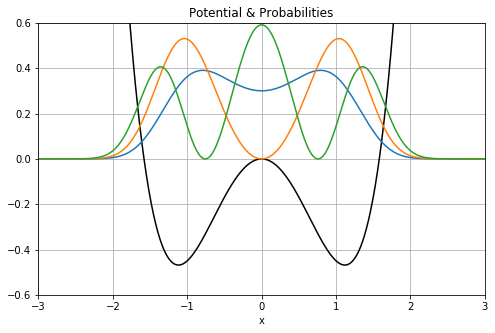

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Per ricavare i valori ottimale di $\mu$ e $\sigma$, ho seguito una procedura piuttosto basilare, ovvero ho costruito una griglia sullo spazio bidimensionale dei parametri, e per ogni coppia di valori ho calcolato il valore d'aspettazione dell'Hamiltoniane tramite metodo a blocchi, con un numero blocchi $N_{blk} = 100$ e un numero di step di simulazione per ogni blocco pari a $10^3$.  Confrontando "on the fly" i valori ottenuti, ho quindi potuto estrapolare il minimo dell'energia, ottenendo una stima del ground state. Nello specifico, per svolgere il processo di ottimizzazione, ho fissato una griglia *'ad hoc'* $(\mu,\sigma) \in [0.7,0.8] \times [0.55,0.65]$ divisa in $100$ passi, e ho ottenuto i seguenti parametri ottimali:

- $\mu = 0.778$;
- $\sigma = 0.628$.

Di seguito ho plottato, per i valori di $\mu$ e $\sigma$ appena ottenuti, l'andamento di $\langle {\hat H} \rangle_{opt}$ con relativa incertezza statistica, in funzione del numero di blocchi utilizzati durante la simulazione.

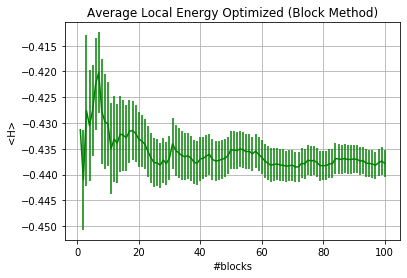

In [3]:
n,ave_H, err_H = np.loadtxt("Esercizio8.2/average.ene.0", usecols=(0,2,3), delimiter=' ', unpack='true')

plt.figure()
plt.errorbar(n,ave_H,err_H,color='g')
plt.title('Average Local Energy Optimized (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('<H>')
plt.grid(True)
plt.show()

Come si osserva dal grafico soprariportato, il valore d'aspettazione dell'Hamiltoniana calcolato sullo stato di prova ottimizzato, tende a convergere ad un valore leggermente più grande di quello atteso $(\simeq -0.46)$. Ciò, oltre a corroborare la disuguaglianza alla base del principio variazionale, ci permette di concludere che, per quato simile, la funzione d'onda di prova scelta, scritta come sovrapposizione di due gaussiane, non è in grado descrivere oltre un certo margine di precisione, le proprietà attese per il ground state. Per mostrare questo, ho riportato nel pannello sottostante il confronto tra l'andamento analitico di $|\Psi_T(x)|^2$, quello ottenuto a partire dai dati della simulazione, e il modulo quadro della funzione d'onda di GS calcolata numericamente, risolvendo l'equazione di Schrodinger scritta in forma matricale.

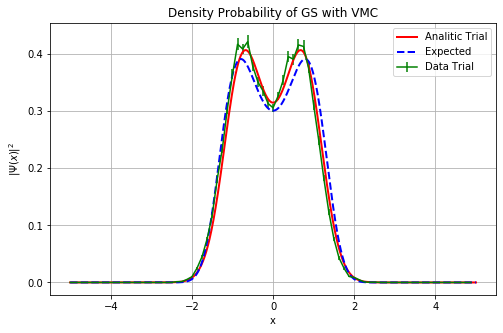

In [4]:
#optimized parameters
mu = 0.778
sigma = 0.628

def gaussian(x,a,b,c):  # defining the fitting function (Gaussian)
    return a * np.exp(-(x-c)**2/(2*b**2))

def psiTrial(x):
    return gaussian(x,1,sigma,mu) + gaussian(x,1,sigma,-mu)

x_data,prob_data,err_data = np.loadtxt("Esercizio8.2/average.prob.0", usecols=(0,1,2), delimiter=' ', unpack='true')
y = np.linspace(-5,5,1000)

scale = 0.365
plt.figure(figsize=(8,5))
plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title('Density Probability of GS with VMC')
plt.errorbar(x_data,prob_data,err_data,color='g',label='Data Trial')
plt.plot(y,scale*(psiTrial(y))**2,color='r',linestyle='solid',label='Analitic Trial', linewidth=2.0)
plt.plot(y,(psi[0])**2,color='b',linestyle='dashed',label='Expected', linewidth=2.0)
plt.grid(True)
plt.legend()
plt.show()

### <span style="color:darkorange"> Esercizio 08.3</span>

Per svolgere il terzo esercizio, ci è stato fornito un codice in grado di performare sia il PIMC a temperatura finita, che il PIGS a temperatura nulla. Entrambe queste tecniche dovevano essere applicate per studiare il medesimo sistema quantistico unidimensionale introdotto sopra. Una volta apportate le opportune modifiche al codice, ho potuto utilizzare il PIGS $(T=0K)$ per proiettare sullo stato fondamentale i due stati di prova seguenti:

- funzione d'onda costante, $\Psi_T(x)=1$;
- funzione d'onda ottimizzata con metodo variazionale $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$.

In entrambi i casi, ho plottato l'andamento dei valori d'aspettazione di energia cinetica e potenziale in funzione della *time slice*, ovvero in funzione della posizione occupata lungo il polimero (nello specifico ho fissato $timeslices = 300$). Questi valori medi sono stati calcolati attraverso il metodo a blocchi, fissando $N_{blk} = 20$ e simulando un numero di step Monte Carlo per blocco pari a $4 \cdot 10^2$. Infine ho confrontato i risultati delle due simulazioni con quelli ricavati dal codice VMC dell'esercizio precedente.

Per simulare la proiezione della funzione d'onda costante sul GS, ho dovuto fissare un tempo di propagazione immaginario relativamente alto: $\tau = 8$. Questa scelta è stata resa necessaria dal fatto che lo stato di prova selezionato si discosta sensibilmente da quello che sappiamo essere lo stato esatto di ground state, di conseguenza mi aspetto che, per eliminare dalla sovrapposizione della costante le impurità associate alla presenza di stati energetici eccitati, sia indispensabile propagare lo stato per grandi tempi immaginari. Osserviamo inoltre come, non presentando nodi, lo stato esatto di ground state non potrà essere ortogonale alla funzione d'onda costante, in accordo con le ipotesi iniziali  del metodo proiettivo. A questo punto, dopo aver completato un ciclo iniziale di equilibrazione del sistema, ho potuto calcolare i valori d'aspettazione di energia cinetica e potenziale con rispettiva incertezza statistica. Nello specchietto Python sottostante, sono riportati gli andamenti di queste quantità valutate lungo il polimero.

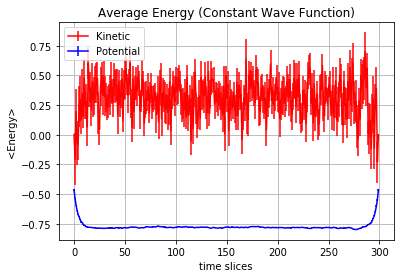

In [5]:
n,ave_K, err_K = np.loadtxt("Esercizio8.3/Const/kinetic.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
n,ave_UC, err_UC = np.loadtxt("Esercizio8.3/Const/potential.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure()
plt.errorbar(n,ave_K,err_K,color='r',label='Kinetic')
plt.errorbar(n,ave_UC,err_UC,color='b',label='Potential')
plt.title('Average Energy (Constant Wave Function)')
plt.xlabel('time slices')
plt.ylabel('<Energy>')
plt.grid(True)
plt.legend()
plt.show()

Notiamo innanzitutto come questi due contributi si sommino per dare un valore d'aspettazione dell'energia totale ($i.e.$ dell'Hamiltoninana) che flutta intorno ad un valore prossimo a quello atteso $(\simeq -0.46)$. Un altro aspetto interessante, su cui vale la pena soffermarsi, riguarda invece l'andamento del valore medio di energia potenziale $\hat V$ in funzione della time slice. Sappiamo infatti che, per tempi di propagazione immaginari $\tau$ sufficientemente grandi, la funzione d'onda di prova proiettata $\Psi (\tau)$ si trova a coincidere con lo stato esatto di GS $\Psi_0$, e quindi i valori di aspettazione calcolati su questi due stati risultano statisticamente indistinguibili.

$$
\langle \Psi (\tau) | \hat V | \Psi (\tau) \rangle = \langle \Psi_0 | \hat V | \Psi_0 \rangle
$$

Tuttavia, muovendomi lungo il polimero, traslo di un tempo immaginario $t$ i miei stati di prova e di conseguenza il mio valore d'aspettazione diventa $\langle \Psi (\tau - t) | \hat V | \Psi (\tau + t) \rangle$. Vediamo quindi che, avvicinandosi alle estremità del polimero $i.e.$ $t \to \tau$ (o $t \to -\tau$, in quanto i due valori d'aspettazione differiscono a meno di una fase e quindi sono fisicamente indistinguibili), uno dei stati diviene $\Psi (2\tau)$ e coicide con una proiezione sempre più precisa sullo stato fondamentale esatto, mentre l'altro diventa $\Psi (0)$, ovvero coincide con lo stato di prova al tempo iniziale prima di cominciare la propagazione. L'overlap ci porta quindi al netto ad ottenere un valore d'aspettazione molto impreciso e distante da quello atteso, in accordo con quanto osservato nel plot soprariportato.

In virtù di quanto appena detto, è chiaro che per valutare l'andamento del modulo quadro della funzione d'onda di prova proiettata , ho dovuto prendere in considerazione solo la parte centrale del mio polimero, nello specifico $120 < time slice < 180$. Di seguito ho riportato il risultato ottenuto confrontato con quello ricavato tramite VMC.

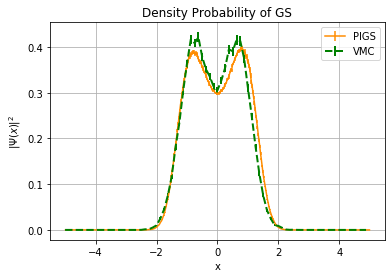

In [6]:
x,p,err = np.loadtxt("Esercizio8.3/Const/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure()
plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title('Density Probability of GS')
plt.errorbar(x,p,err,color='darkorange',label='PIGS')
plt.errorbar(x_data,prob_data,err_data,linestyle='dashed',color='g',label='VMC', linewidth=2.0)
plt.grid(True)
plt.legend()
plt.show()

Il plot soprariportato ci permette di apprezzare la potenza del Path Itegral Ground State e quindi del metodo proiettivo. Vediamo infatti come, anche partendo da una funzione d'onda di prova generica come per l'appunto la funzione costante, diventa possibie, a meno di propagare il sistema per tempi immaginari sufficientemente lunghi, ottenere una stima dell'esatto ground state.

Per quanto riguarda la funzione d'onda ottimizzata, che ricordo essere

$$
\Psi_T^{\sigma,\mu}(x) \propto \exp{\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]}+
                               \exp{\left[ -\frac{(x+\mu)^2}{2\sigma^2} \right]} \qquad con \quad 
                               \begin{cases} \mu = 0.778 \\ \sigma = 0.628 \end{cases}
$$

ho eseguito la proiezione su stato fondamentale fissando inizialmente il tempo di propagazione immaginario $\tau = 8$, di seguito ho riportato anche alcune considerazione riguardo la possibilità di poter abbassare ulteriormente questo valore. Per svolgere la simulazione ho reiterato i passaggi precedenti: dopo una fase iniziale di equilibrazione, ho calcolato i valori d'aspettazione di energia cinetica e potenziale con rispettive incertezze, e ho riportato il loro andamento in funzione della time slice.

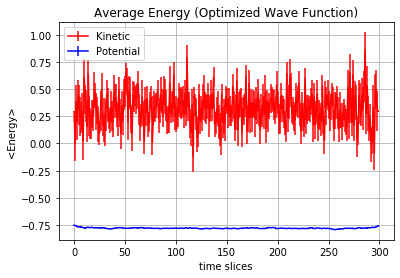

In [7]:
n,ave_K, err_K = np.loadtxt("Esercizio8.3/Opt/kinetic.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
n,ave_UO, err_UO = np.loadtxt("Esercizio8.3/Opt/potential.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure()
plt.errorbar(n,ave_K,err_K,color='r',label='Kinetic')
plt.errorbar(n,ave_UO,err_UO,color='b',label='Potential')
plt.title('Average Energy (Optimized Wave Function)')
plt.xlabel('time slices')
plt.ylabel('<Energy>')
plt.grid(True)
plt.legend()
plt.show()

Nuovamente notiamo come la somme di queste due quantità ci porti ad avere un'energia totale che fluttua intorno al valore esatto. Confrontando inoltre il risultato appena ottenuto, con quello precedentemente ricavato proiettando sul GS la funzione d'onda costante, possiamo osservare come l'andamento del valore d'aspettazione del potenziale, tenda, in corrispondenza degli estremi del polimero, ad avvicinarsi al valore esatto in misura maggiore rispetto al caso precedente. Ciò è dovuto principalmente al fatto che, questa volta, stiamo proiettando sul GS una funzione d'onda che già inizialmente appare molto simile allo stato fondamentale esatto.

Nel pannello sottostante ho riportato il confronto tra il modulo quadro della funzione d'onda proiettata tramite PIGS e quello ottenuto dal VMC.

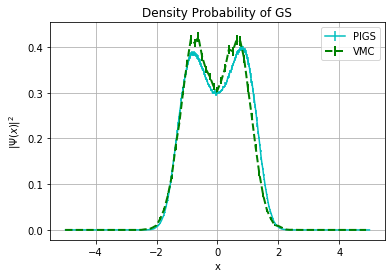

In [8]:
x,p,err = np.loadtxt("Esercizio8.3/Opt/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure()
plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title('Density Probability of GS')
plt.errorbar(x,p,err,color='c',label='PIGS')
plt.errorbar(x_data,prob_data,err_data,linestyle='dashed',color='g',label='VMC', linewidth=2.0)
plt.grid(True)
plt.legend()
plt.show()

In accordo con quanto detto sopra, mi aspetto che applicando il PIGS alla funzione d'onda ottimizzata diventi possibile abbassare il tempo di propagazione immaginario, in quanto si sta proiettando sul GS uno stato di partenza già molto simile allo stato ricercato. Per verificare ciò, ho quindi ripetuto la simulazione abbassando di volta in volta il valore di $\tau$, fino a raggiungere un valore di $\tau = 2$ al di sotto del quale il metodo proiettivo cominciava a diventare inefficiente. Di seguito ho riportato un plot in cui viene mostrato il confronto tra i valori d'aspettazione dell'energia potenziale in funzione della time slice, per i tre casi d'interesse: PIGS di funzione costante, ottimizzata per $\tau = 8$ e per $\tau = 2$.

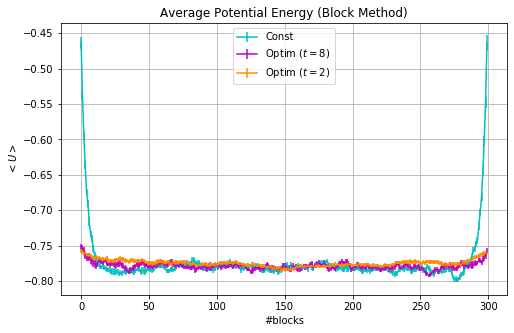

In [9]:
n,ave_U2, err_U2 = np.loadtxt("Esercizio8.3/Opt/2/potential.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(8,5))
plt.errorbar(n,ave_UC,err_UC,color='c',label='Const')
plt.errorbar(n,ave_UO,err_UO,color='m',label='Optim ($t = 8$)')
plt.errorbar(n,ave_U2,err_U2,color='darkorange',label='Optim ($t = 2$)')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U>$')
plt.grid(True)
plt.legend()
plt.show()

Infine, l'ultima richiesta dell'esercizio prevedeva di utilizzare il codice a temperatura finita (PIMC), per studiare come cambiano i risultati della simulazione se si considera il sistema quantistico monodimensionale per $T>0$ e quindi preparato in uno stato miscela. Di seguito ho riportato gli andamenti della densità di probabilità ($i.e.$ modulo quadro della funzione d'onda campionata), per diversi valori di temperatura, facendo variare quest'ultima all'interno di un range ragionevole e comparabile con l'ordine di grandezza dell'energia dei primi stati eccitati, $i.e.$ $T \in [1K,100K]$.

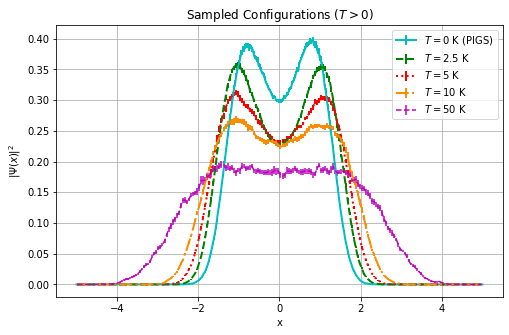

In [10]:
x,p,err = np.loadtxt("Esercizio8.3/Const/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x1,p1,err1 = np.loadtxt("Esercizio8.3/PIMC/2.5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x2,p2,err2 = np.loadtxt("Esercizio8.3/PIMC/5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x3,p3,err3 = np.loadtxt("Esercizio8.3/PIMC/10/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x4,p4,err4 = np.loadtxt("Esercizio8.3/PIMC/50/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(8,5))
plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')
plt.title('Sampled Configurations ($T>0$)')
plt.errorbar(x,p,err,linestyle='solid',color='c',label='$T=0$ K (PIGS)', linewidth=2.0)
plt.errorbar(x1,p1,err1,linestyle='dashed',color='g',label='$T=2.5$ K', linewidth=2.0)
plt.errorbar(x2,p2,err2,linestyle='dotted',color='r',label='$T=5$ K', linewidth=2.0)
plt.errorbar(x3,p3,err3,linestyle='dashdot',color='darkorange',label='$T=10$ K', linewidth=2.0)
plt.errorbar(x4,p4,err4,linestyle='dashed',color='m',label='$T=50$ K', linewidth=1.5)
plt.grid(True)
plt.legend()
plt.show()

Si osserva immediatamente come la densità di occupazione dei livelli energetici tenda a mutare al variare della temperatura. Nello specifico vediamo come essa, al crescere di $T$, tenda ad allargarsi sempre di più, andando ad occupare regioni di spazio sempre più estese. Questo cambiamento è dovuto al fatto che, aumentando la temperatura del sistema, diventa possibile popolare anche gli stati eccitati più energetici, caratterizzati da un supporto, e quindi un estensione spaziale maggiore. Infatti aumentando l'energia del sistema sono libero di muovermi all'interno di una buca di potenziale sempre più larga.